In [1]:
import SimpleITK as sitk
from viz import *
from clinical_evaluation.registration import pipeline
from clinical_evaluation.utils import preprocess, ops
from clinical_evaluation.evaluation import metrics
from pathlib import Path

In [2]:
pipeline = pipeline.RegistrationPipeline()

In [4]:
# Load planning CT
CT = pipeline.load("/home/suraj/Workspace/data/maastro/phantoms/source.nrrd")

# Load masks of interest
# bladder_mask = pipeline.load("/home/suraj/Repositories/data/cervix-eval/CT/21700691/0/BLADDER.nrrd")
# bowel_mask = pipeline.load("/home/suraj/Repositories/data/cervix-eval/CT/21700691/0/BOWELAREA.nrrd")

In [5]:
CT_mask = pipeline.get_body_mask(CT)
CT = ops.apply_mask(CT, CT_mask)

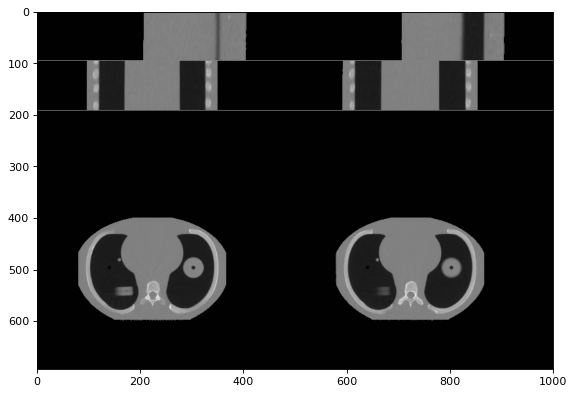

In [6]:
show_mid_slices(CT)

In [8]:
# Load first CBCT in the sequence of CBCTS
CBCT = pipeline.load("/home/suraj/Workspace/data/maastro/phantoms/target.nrrd")
# CBCT = preprocess.hu_correction(CBCT)
CBCT_mask = pipeline.get_body_mask(CBCT, -700)

CBCT = ops.apply_mask(CBCT, CBCT_mask)

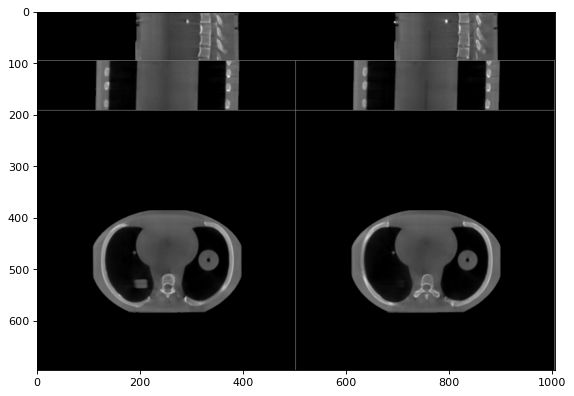

In [9]:
show_mid_slices(CBCT)

### SimpleElastix Registration Process


In [11]:
# Perform deformable registration
params = {
"config": ["../configs/Par0032_rigid.txt", \
            "../configs/Par0032_bsplines.txt"]
}

dpCT, elastixfilter = pipeline.deform(CT, CBCT, params, mode='Elastix')


In [12]:
dpCT = ops.apply_mask(dpCT, CBCT_mask)

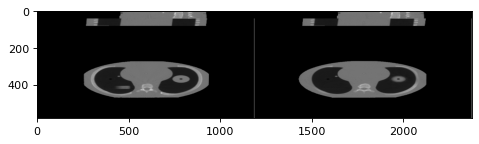

In [13]:
show_mid_slices(dpCT)

In [22]:
out_dir = Path("/home/suraj/Repositories/data/maastro/phantoms_registered").resolve()
out_dir.mkdir(parents=True, exist_ok=True)

In [23]:
out_dir

PosixPath('/home/suraj/Repositories/data/maastro/phantoms_registered')

In [24]:
# Save CBCT, CT and deformed CT
sitk.WriteImage(CBCT, str(out_dir / f"target.nrrd"), True)
sitk.WriteImage(CT, str(out_dir / f"source.nrrd"), True)
sitk.WriteImage(dpCT, str(out_dir / f"deformed.nrrd"), True)

In [25]:
CBCT_mask = sitk.Cast(CBCT_mask, sitk.sitkInt8) 

In [26]:
sitk.WriteImage(CBCT_mask, str(out_dir / f"BODY.nrrd"), True)